<div>
    <h2>1. Introduction</h2>
</div>

Support Vector Machine selects the best separating hyperplane that divides the data into two groups (binary classifier). Although, SVM can be applied for data with more than two groups.

The best hyperplane has the largest possible distance between the groups. Using the hyperplane, the SVN classifies the new data.

(for a usage example, see 2-KnearestNeighbors/14-CancerClassification)

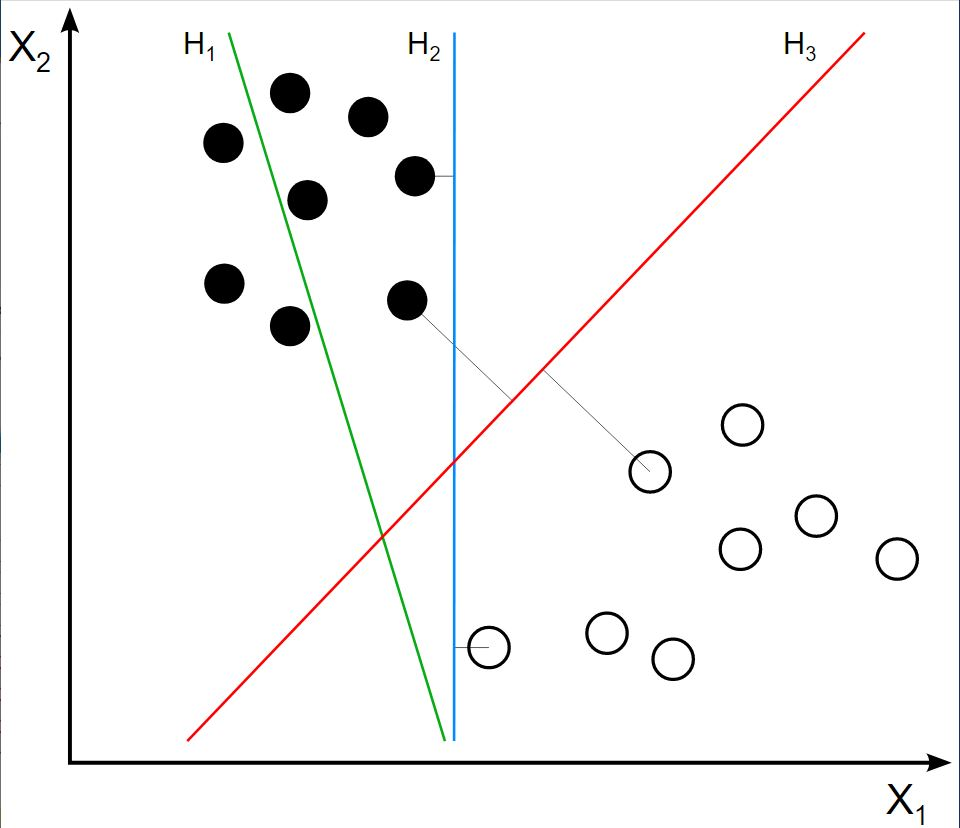

<div>
    <h2>2. Vectors</h2>
</div>

Notation: $\vec{x}$ or $\mathbf {x}$, $\qquad$ example: $\vec{x} = [3,4]$

Magnitude (norm-2): $\|\vec{x}\| = \sqrt{\sum{x_i^2}}$, $\qquad$ example: $\|\vec{x}\| = \sqrt{3^2+4^2}$ 

Inner product (dot product): $\vec{x}$ $.$ $\vec{y}$ = $\sum{x_i*y_i}$ $\qquad$ example: $\vec{x} . \vec{y} = 3*5+4*6 $

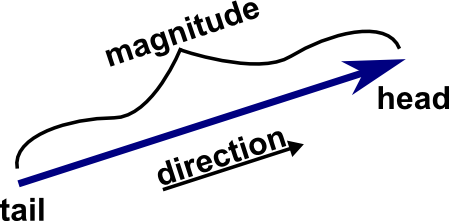

<div>
    <h2>3. Support Vector Machine (SVN)</h2>
</div>

Given $\mathbf{w}$ a vector perpendicular to the best hyperplane and $\mathbf{u}$ a vector to be classified, therefore, if:

$\mathbf{u} . \mathbf{w} + b > 0$ than blue(+);

$\mathbf{u} . \mathbf{w} + b < 0$ than green(-);

$\mathbf{u} . \mathbf{w} + b = 0$ than decision line;

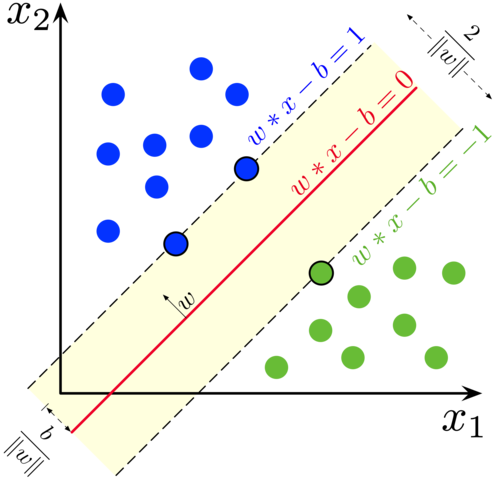

We are given a training dataset of $n$ points of the form

$${\displaystyle (\mathbf {x}_{1},y_{1}),\ldots ,(\mathbf {x} _{n},y_{n})}$$

where the ${\displaystyle y_{i}}$ are either 1 or −1, each indicating the class to which the point ${\displaystyle \mathbf {x} _{i}}$ belongs. Each ${\displaystyle \mathbf {x} _{i}}$ is a ${\displaystyle p}$-dimensional real vector. We want to find the "maximum-margin hyperplane" that divides the group of points ${\displaystyle \mathbf {x} _{i}}$ for which ${\displaystyle y_{i}=1}$ from the group of points for which ${\displaystyle y_{i}=-1}$, which is defined so that the distance between the hyperplane and the nearest point ${\displaystyle \mathbf {x} _{i}}$ from either group is maximized.

Any hyperplane can be written as the set of points ${\displaystyle \mathbf {x} }$  satisfying

$${\displaystyle \mathbf {w} ^{T}\mathbf {x} -b=0,}$$

where ${\displaystyle \mathbf {w} }$  is the (not necessarily normalized) normal vector to the hyperplane. This is much like Hesse normal form, except that ${\displaystyle \mathbf {w} }$  is not necessarily a unit vector. The parameter ${\displaystyle {\tfrac {b}{\|\mathbf {w} \|}}}$ determines the offset of the hyperplane from the origin along the normal vector ${\displaystyle \mathbf {w} }$.

<h4>3.1 Hard-margin</h4>

If the training data is linearly separable, we can select two parallel hyperplanes that separate the two classes of data, so that the distance between them is as large as possible. The region bounded by these two hyperplanes is called the "margin", and the maximum-margin hyperplane is the hyperplane that lies halfway between them. With a normalized or standardized dataset, these hyperplanes can be described by the equations

* ${\displaystyle \mathbf {w} ^{T}\mathbf {x} -b=1}$ (anything on or above this boundary is of one class, with label 1)
and

* ${\displaystyle \mathbf {w} ^{T}\mathbf {x} -b=-1}$ (anything on or below this boundary is of the other class, with label −1).

We also have to prevent data points from falling into the margin, we add the following constraint: for each ${\displaystyle i}$ either

* ${\displaystyle \mathbf {w} ^{T}\mathbf {x} _{i}-b\geq 1}$, if ${\displaystyle y_{i}=1}$,

* ${\displaystyle \mathbf {w} ^{T}\mathbf {x} _{i}-b\leq -1}$, if ${\displaystyle y_{i}=-1}$.

These constraints state that each data point must lie on the correct side of the margin. This can be rewritten as

$${\displaystyle y_{i}(\mathbf {w} ^{T}\mathbf {x} _{i}-b)\geq 1,\quad {\text{ for all }}1\leq i\leq n.}$$

Geometrically, the distance between these two hyperplanes is ${\displaystyle {\tfrac {2}{\|\mathbf {w} \|}}}$, since

$$\mathbf{width} = \frac{\mathbf {(x^{+} - x^{-}}).\mathbf {w} }{\|\mathbf {w}\|} = \frac{2}{\|\mathbf {w}\|}$$

For both $\mathbf {x}^{+}, \mathbf {x}^{-}$, using $y_i(\mathbf {w}^{T}\mathbf {x}_i+b)-1 = 0$, we have $\mathbf {w}^{T}\mathbf {x}_i = b+1$, using in $\mathbf{width}$ function, we have

$$\mathbf {width} = \frac{2}{\|\mathbf {w}\|}$$

therefore, to maximize the distance between the planes, we want to minimize ${\displaystyle \|\mathbf {w} \|}$. The distance is computed using the distance from a point to a plane equation. 

We can put this together to get the optimization problem:

* Minimize ${\displaystyle \|\mathbf {w} \|}$ subject to ${\displaystyle y_{i}(\mathbf {w} ^{T}\mathbf {x} _{i}-b)\geq 1}$ for ${\displaystyle i=1,\ldots ,n}$

The ${\displaystyle \mathbf {w} }$  and ${\displaystyle b}$ that solve this problem determine our classifier, ${\displaystyle \mathbf {x} \mapsto \operatorname {sgn}(\mathbf {w} ^{T}\mathbf {x} -b)}$ where ${\displaystyle \operatorname {sgn}(\cdot )}$ is the sign function.

An important consequence of this geometric description is that the max-margin hyperplane is completely determined by those ${\displaystyle {\vec {x}}_{i}}$ that lie nearest to it. These ${\displaystyle \mathbf {x} _{i}}$ are called support vectors.

<h2>4. Optimization Problem</h2>

The optimization problem can be rewritten as 

* Minimize ${\displaystyle \ \frac{1}{2} \|\mathbf {w} \|^2}$ s.t. ${\displaystyle y_{i}(\mathbf {w} ^{T}\mathbf {x} _{i}-b)\geq 1}$ for ${\displaystyle i=1,\ldots ,n}$


The Lagrangian function of this problem is given by

$$L(\mathbf{w},b,\mathbf{\lambda})  = \frac{1}{2} \|\mathbf{w}\|^2 - \sum_i \lambda_i [y_i(\mathbf{w}^T\mathbf{x}_i +b) - 1]$$

where $\lambda_i$ are elements of $\mathbf{\lambda}$. To Minimize $L(\mathbf{w},b,\mathbf{\lambda})$, we use partial derivation, and by the Lagrange multiplier theory we have

* $ {\displaystyle \frac{\partial L}{\partial \mathbf{w}} = \mathbf{w} - \sum_i \lambda_i y_i \mathbf{x}_i = 0}$

* $ {\displaystyle \frac{\partial L}{\partial b} = \sum_i \lambda_i y_i = 0}$ 

From this set, we have

* ${\displaystyle \mathbf{w} = \sum_i \lambda_i y_i \mathbf{x}_i}$

* ${\displaystyle \sum_i \lambda_i y_i = 0}$

Using $\frac{\partial L}{\partial \mathbf{w}}$ in $L(\mathbf{w},b,\mathbf{\lambda})$ we have 

$$ L(\mathbf{w},b,\mathbf{\lambda}) = \frac{1}{2} \left(\sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x}^T_i \mathbf{x}_j \right) - \sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x}^T_i \mathbf{x}_j - \left(\sum_i \lambda_i y_i \right) b + \sum_i \lambda_i $$

Using $\frac{\partial L}{\partial \mathbf{w}}$ in $L(\mathbf{w},b,\mathbf{\lambda})$ and simplifying  the function, we have 

$$ L(\mathbf{w},b,\mathbf{\lambda}) = - \frac{1}{2} \left(\sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x}^T_i \mathbf{x}_j \right) + \sum_i \lambda_i $$

Therefore, the minimization problem is given by

$$ \mbox{Minimize} \sum_i \lambda_i - \frac{1}{2} \left(\sum_i \sum_j \lambda_i \lambda_j y_i y_j \mathbf{x}^T_i \mathbf{x}_j \right)$$

<div>
    <h2>5. Optimization Process</h2>
</div>

With ${\displaystyle \mathbf {w} }$  and ${\displaystyle b}$ obtained solving the Convex opimization problem, we can classify with ${\displaystyle \mathbf {x} \mapsto \operatorname {sgn}(\mathbf {w} ^{T}\mathbf {x} -b)}$ (which is ${\displaystyle y = \operatorname {sgn}(\mathbf {w} ^{T}\mathbf {x} -b)}$ in codding) where ${\displaystyle \operatorname {sgn}(\cdot )}$ is the sign function.

In general, to find the values of $\mathbf{w}$ and $b$, the optimization starts $\mathbf{w}$ at an initial value and reduce the value (norm) with some step. The negative value also needs to be tested. The step should reduce as we approximate the optimum. We select the biggest $b$ possible for the given $\mathbf{w}$.

The python package to solve optimization problems is "cvxopt", "qp".

<h2>6. Non Linear Data</h2>

In the case of nonlinear data, we can add a dimension, to create linear separated sets. It is possible to make calculations with infinite dimensions, using kernels.

The new dimensions can be created in the function of the features.

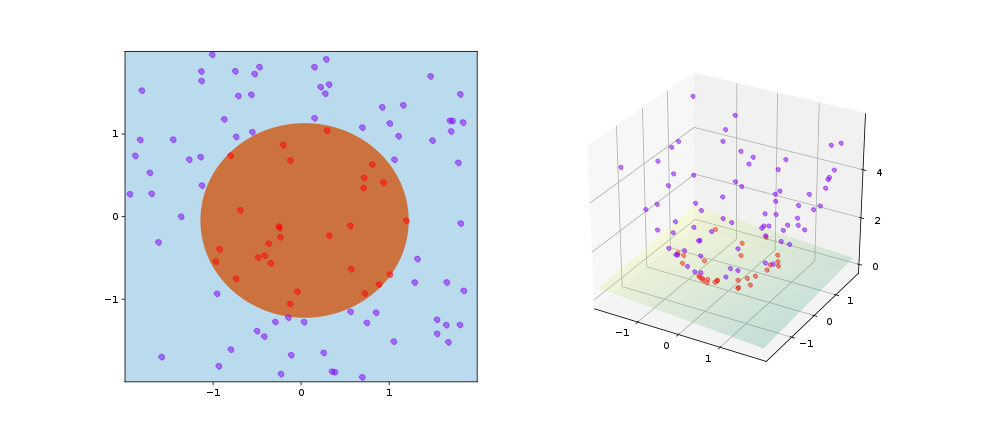


The classification is given by

$$y = sign(\mathbf{w}.\mathbf{x}+b)$$

Now we can use the features $\mathbf{x}$ as $\mathbf{z}$, where $\mathbf{z}$ has unknow dimension

<h2>7. Kernels</h2>

The kernel $K$ produces an inner product, which is an scalar and can be written as 

* $K(\mathbf{x},\mathbf{x}') = \mathbf{z}.\mathbf{z}'$
where $\mathbf{z} = f(\mathbf{x})$ and $\mathbf{z}' = f(\mathbf{x}')$

For instance, $\mathbf{z}$ can be defined by a quadractic polynomial space, therefore, give $\mathbf{x} = [x_1,x_2]$ we have $\mathbf{z} = [x_1, x_2, x_1^2,x_2^2, x_1 x_2]$ and $K(\mathbf{x},\mathbf{x}')$ is given by

$$K(\mathbf{x},\mathbf{x}') = \mathbf{z} . \mathbf{z} = 1+ x_1 x_1' + x_2x_2 ' + x_1^2 {(x_1')}^2 + x_2^2 {(x_2')}^2 + x_1 x_1' x_2 x_2' $$

Which is knowing as the polynomial kernel. The polinomial kernel can be write as

$$K(\mathbf{x},\mathbf{x}') = \mathbf{z} . \mathbf{z} = (1+ \mathbf{x} . \mathbf{x}')^p $$

where, $\mathbf{x}$ is $n$ dimensional, and $p$ is the order of the polynomial.

An example of kernel with infinite dimension is the exponential, as

$$K(\mathbf{x},\mathbf{x}') = exp(-\gamma \|\mathbf{x} . \mathbf{x}'\|^2) = \mathbf{e}^{-\gamma \|\mathbf{x} . \mathbf{x}'\|^2} $$

A high number of dimensions and kernels can create issues, such as finding groups in a set that originally does not mean to be separable.

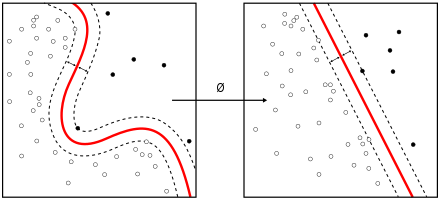

<h2>8. Soft Margin</h2>

Instant of using kernels to transfor the data and finding a hard margin to separate in groups, it is possible to find margin with some degree of error, called "slack".

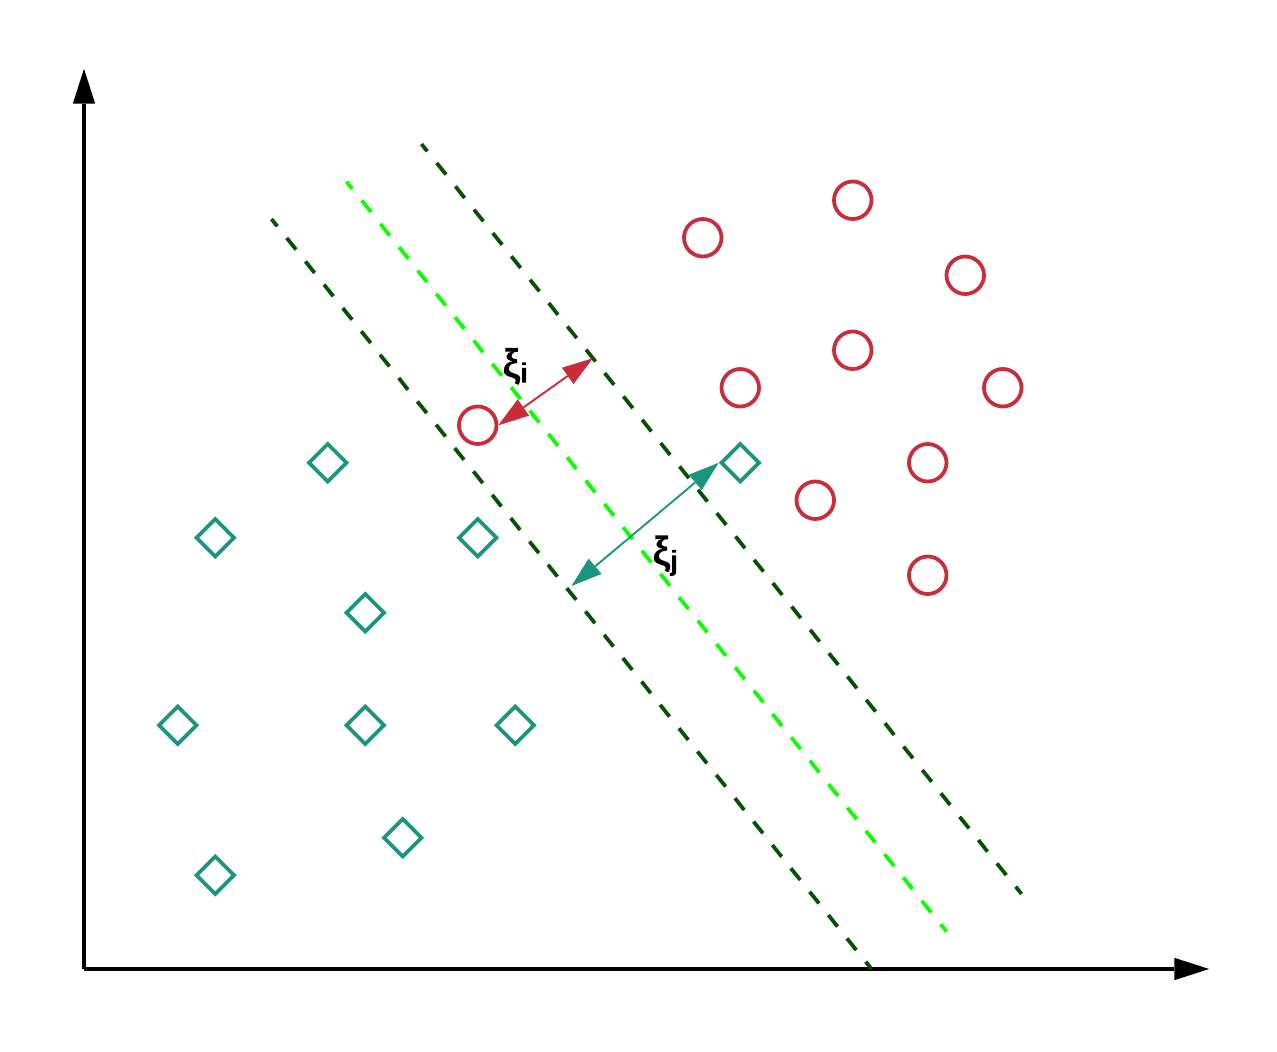

Let $\varepsilon_i$ be the slack variable of data $i$. Therefore, we have

$$y_i(\mathbf{w} \mathbf{x}_i+b) \ge 1-\varepsilon_i$$

The optimization problem of finding $\mathbf{w}$  with soft margins includes $\varepsilon_i$, and is given by

* Minimize ${\displaystyle \frac{1}{2} \|\mathbf{w}\| + c \left(\sum_i \varepsilon_i \right)}$

where $c$ is the multiplier of the slack variables.

<h2>9. Kernel methods</h2>

Kernel methods can be thought of as instance-based learners: rather than learning some fixed set of parameters corresponding to the features of their inputs, they instead "remember" the ${\displaystyle i}$-th training example ${\displaystyle (\mathbf {x} _{i},y_{i})}$ and learn for it a corresponding weight ${\displaystyle w_{i}}$. Prediction for unlabeled inputs, i.e., those not in the training set, is treated by the application of a similarity function ${\displaystyle k}$, called a kernel, between the unlabeled input ${\displaystyle \mathbf {x'} }$  and each of the training inputs ${\displaystyle \mathbf {x} _{i}}$. For instance, a kernelized binary classifier typically computes a weighted sum of similarities

${\displaystyle {\hat {y}}=\operatorname {sgn} \sum _{i=1}^{n}w_{i}y_{i}k(\mathbf {x} _{i},\mathbf {x'} )}$,

where

* ${\displaystyle {\hat {y}}\in \{-1,+1\}}$ is the kernelized binary classifier's predicted label for the unlabeled input ${\displaystyle \mathbf {x'} }$  whose hidden true label ${\displaystyle y}$ is of interest;
* ${\displaystyle k\colon {\mathcal {X}}\times {\mathcal {X}}\to \mathbb {R} }$  is the kernel function that measures similarity between any pair of inputs ${\displaystyle \mathbf {x} ,\mathbf {x'} \in {\mathcal {X}}}$;
* the sum ranges over the n labeled examples ${\displaystyle \{(\mathbf {x} _{i},y_{i})\}_{i=1}^{n}}$ in the classifier's training set, with ${\displaystyle y_{i}\in \{-1,+1\}}$;
* the ${\displaystyle w_{i}\in \mathbb {R} }$  are the weights for the training examples, as determined by the learning algorithm;


<h2>10. More Groups</h2>

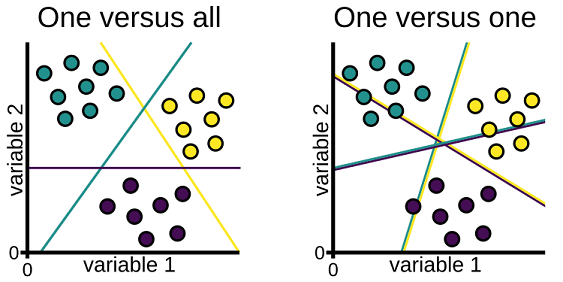